In [215]:
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, \
    cross_val_predict
from sklearn.base import clone, BaseEstimator
from sklearn.metrics import confusion_matrix, precision_score, recall_score, \
    f1_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#### Dataset
 - Descarga de dataset MNIST
 - Formato datos
 - Obtención conjunto de entrenamiento y test

In [2]:
# Dataset MNIST
mnist = fetch_openml('mnist_784', version=1)
# En general, los datasets de sklearn tienen una estructura de diccionar similar
# Contiene entre otras cosas, un df de datos, una serie de etiquetas y una
# descripción del dataset
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist['data'], mnist['target']
X.shape, y.shape

((70000, 784), (70000,))

In [4]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Se convierten a arrays
X, y = np.array(X), np.array(y)
X.shape, y.shape

((70000, 784), (70000,))

In [6]:
X, y

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array(['5', '0', '4', ..., '4', '5', '6'], dtype=object))

In [7]:
y = y.astype(np.uint8)

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

#### Exercise 1
- Construir un clasificador que alcance alrededor de un 97% de accuracy en el
  conjunto de test

In [ ]:
knn_cls = KNeighborsClassifier()

In [12]:
param_grid = [{
    'weights': ['uniform', 'distance'],
    'n_neighbors': [3, 4, 5]
}]

knn_cls = KNeighborsClassifier()

grid_search = GridSearchCV(knn_cls, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True, verbose=3)

grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END n_neighbors=3, weights=uniform;, score=(train=0.971, test=0.942) total time=  50.8s
[CV 2/5] END n_neighbors=3, weights=uniform;, score=(train=0.971, test=0.944) total time=  46.0s
[CV 3/5] END n_neighbors=3, weights=uniform;, score=(train=0.970, test=0.945) total time=  46.0s
[CV 4/5] END n_neighbors=3, weights=uniform;, score=(train=0.972, test=0.938) total time=  45.8s
[CV 5/5] END n_neighbors=3, weights=uniform;, score=(train=0.971, test=0.945) total time=  45.8s
[CV 1/5] END n_neighbors=3, weights=distance;, score=(train=1.000, test=0.942) total time=  45.1s
[CV 2/5] END n_neighbors=3, weights=distance;, score=(train=1.000, test=0.946) total time=  44.8s
[CV 3/5] END n_neighbors=3, weights=distance;, score=(train=1.000, test=0.945) total time=  45.9s
[CV 4/5] END n_neighbors=3, weights=distance;, score=(train=1.000, test=0.941) total time=  45.6s
[CV 5/5] END n_neighbors=3, weights=distance;, score=(train=1.0

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='accuracy', verbose=3)

In [13]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [14]:
grid_search.best_score_

0.9465166666666667

In [18]:
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.7903

In [19]:
param_grid = [{
    'weights': ['uniform', 'distance'],
    'n_neighbors': [3, 4, 5]
}]

knn_cls = KNeighborsClassifier()

grid_search = GridSearchCV(knn_cls, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True, verbose=3)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END n_neighbors=3, weights=uniform;, score=(train=0.985, test=0.972) total time= 6.0min
[CV 2/5] END n_neighbors=3, weights=uniform;, score=(train=0.986, test=0.971) total time=  24.4s
[CV 3/5] END n_neighbors=3, weights=uniform;, score=(train=0.986, test=0.969) total time=  24.2s
[CV 4/5] END n_neighbors=3, weights=uniform;, score=(train=0.986, test=0.969) total time=  24.8s
[CV 5/5] END n_neighbors=3, weights=uniform;, score=(train=0.986, test=0.970) total time=  25.8s
[CV 1/5] END n_neighbors=3, weights=distance;, score=(train=1.000, test=0.972) total time=  24.9s
[CV 2/5] END n_neighbors=3, weights=distance;, score=(train=1.000, test=0.972) total time=  24.7s
[CV 3/5] END n_neighbors=3, weights=distance;, score=(train=1.000, test=0.970) total time=  25.2s
[CV 4/5] END n_neighbors=3, weights=distance;, score=(train=1.000, test=0.970) total time=  24.4s
[CV 5/5] END n_neighbors=3, weights=distance;, score=(train=1.0

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='accuracy', verbose=3)

In [20]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [21]:
grid_search.best_score_

0.9716166666666666

In [22]:
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9714

In [23]:
# El escalado del conjunto de entrenamiento ha perjudicado notablemente el
# rendimiento del modelo en el conjunto de test

#### Exercise 2
- Data Augmentation: Por cada imagen del dataset crear cuatro copias de la      misma con cambios en cuatro direcciones (izquierda, derecha, arriba, abajo)
- Entrenar el algoritmo con este nuevo dataset

In [24]:
from scipy.ndimage.interpolation import shift

In [47]:
def shift_image(image, dx, dy):
    shifted_image = shift(image.reshape(28,28), [dy, dx], cval=0, mode='constant')
    return shifted_image.reshape(-1)

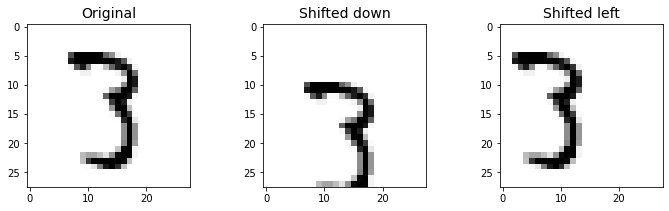

In [50]:
image = X_train[356]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [85]:
X_train_augmented, y_train_augmented = list(zip(*[
    (shift_image(img, d[0], d[1]), label) if not i==0 else (img, label) 
    for img, label in zip(X_train, y_train) 
    for i, d in enumerate(((0,0),(1,0),(-1,0),(0,1),(0,-1)))
]))

In [91]:
X_train_augmented, y_train_augmented = shuffle(X_train_augmented, y_train_augmented, random_state=0)

In [93]:
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [97]:
X_train_augmented.shape, y_train_augmented.shape

((300000, 784), (300000,))

In [112]:
knn_cls = KNeighborsClassifier(**grid_search.best_params_)

In [113]:
knn_cls.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [114]:
y_pred = knn_cls.predict(X_test)
accuracy_score(y_test, y_pred)

0.9763

#### Exercise 3
- Descargar dataset Titanic de kaggle
- Análisis exploratorio
- Preparación de los datos
- Selección de modelo y ajuste fino de hiperparámetros
- Entrenar modelo
- Predicción

Objetivo: Predecir si un pasajero sobrevivió o no basado en atributos

In [116]:
import urllib.request

In [185]:
titanic_path = os.path.join('..\\..', 'datasets', 'titanic')
download_url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/titanic/"

def fetch_data(url, path):
    if not os.path.isdir(path):
        os.makedirs(path)
    for filename in ('train.csv', 'test.csv'):
        if not os.path.isfile(os.path.join(path, filename)):
            print('Downloading', filename)
            urllib.request.urlretrieve(url + filename, os.path.join(path, filename))

In [186]:
fetch_data(download_url, titanic_path)

In [188]:
train_data = pd.read_csv(os.path.join(titanic_path, 'train.csv'))
test_data = pd.read_csv(os.path.join(titanic_path, 'test.csv'))

In [190]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [192]:
# Se establece la columna identificador pasajero como columna índice
train_data = train_data.set_index('PassengerId')
test_data = test_data.set_index('PassengerId')

In [193]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [195]:
# Valores faltantes
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [201]:
# Los atributos edad, cabina y embargo contienen valores faltantes. 
# - Se descarta el atributo cabina porque falta el 77% de los valores.
# - El atributo edad contiene un 20% de NAs --> imputar con mediana edad

# Los atributos nombre y ticket no son de utilidad. Se descartan

In [202]:
# estadísticas atributos numéricos
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [204]:
# El porcentaje de supervivientes es del 38%. Accuracy puede ser buena métrica
# para evaluar el modelo.
# El 50% de los pasajeros pertenece a la clase 3
# El 75% de los pasajeros tiene una edad inferior a 38 años. El promedio de
# edad es inferior a 30 años
# El 75% de los pasajeros no tiene hermanos/as o esposos/as a bordo
# Casi ningun pasajero tiene relación de padres e hijos a bordo (>75%)
# El promedio del coste del ticket es de 32$ y para el 75% de los pasajeros
# el coste su coste fue inferior a 31$

In [205]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [206]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [207]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [208]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [210]:
# Se construyen los pipelines de preprocesamiento

In [211]:
# Pipeline para atributos numéricos

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

In [214]:
# Pipeline para atributos categóricos

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("cat_encoder", OneHotEncoder(sparse=False))
])

In [216]:
# Pipeline de procesamiento
num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

preprocess_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

In [217]:
X_train = preprocess_pipeline.fit_transform(
    train_data[num_attribs + cat_attribs])
X_train

array([[-0.56573582,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.6638609 ,  0.43279337, -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [-0.25833664, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.10463705,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25833664, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20276213, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ]])

In [219]:
# Etiquetas
y_train = train_data['Survived']
y_train

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [222]:
# Entranamiento del clasificador random forest
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [224]:
# Predicciones
X_test = preprocess_pipeline.transform(test_data[num_attribs + cat_attribs])
y_pred = forest_clf.predict(X_test)

In [226]:
# Al no haber etiquetas de test, se realiza validación cruzada para tener una
# idea de qué tal lo está haciendo el modelo.
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)

In [227]:
forest_scores

array([0.75555556, 0.79775281, 0.76404494, 0.80898876, 0.88764045,
       0.83146067, 0.83146067, 0.7752809 , 0.84269663, 0.84269663])

In [228]:
forest_scores.mean()

0.8137578027465668

In [232]:
# Entrenamiento del clasificador support vector machine
svm_clf = SVC(gamma='auto')
svm_scores = cross_val_score(svm_clf,X_train, y_train, cv=10)

In [233]:
svm_scores

array([0.81111111, 0.85393258, 0.7752809 , 0.87640449, 0.83146067,
       0.79775281, 0.82022472, 0.78651685, 0.85393258, 0.84269663])

In [234]:
svm_scores.mean()

0.8249313358302123

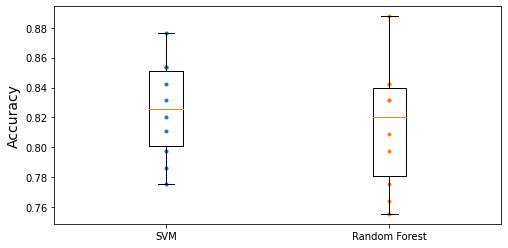

In [242]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

In [246]:
40//15

2